In [254]:
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pydotplus

from scipy import stats
# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss
#preprocessing

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

sc = StandardScaler()
from sklearn.decomposition import PCA

# creating regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


In [2]:
data=pd.read_csv('Historical_train.csv')
data.head(2)

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,52836,58868,Historical,266198,S,0,0,1255901,32.5,2004,26,27.57,10.99,0
1,73653,82447,Historical,2405151,S,0,0,208404,70.0,1988,21,15.99,40.02,1


## EDA

In [3]:
df=data.copy()

In [4]:
len(df)

53197

In [5]:
df['Unnamed: 0'].nunique()

53197

In [6]:
df['Order'].nunique()

53197

## Drop the columns which don't have any contribution towards  Target variable

In [7]:
# Unnamed and order can be droped from dataframe as they are unique values
df.drop(columns=['Unnamed: 0','Order'],axis=1,inplace=True)

In [8]:
df.head(2)

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,Historical,266198,S,0,0,1255901,32.5,2004,26,27.57,10.99,0
1,Historical,2405151,S,0,0,208404,70.0,1988,21,15.99,40.02,1


In [9]:
df['File_Type'].unique()

array(['Historical'], dtype=object)

In [10]:
df['SKU_number'].nunique()

53197

In [11]:
# Droppin File type(one value) and Skunumber(unique no's) also as they dont contribute towards target variable.
df.drop(columns=['File_Type','SKU_number'],axis = 1,inplace = True)

In [12]:
df.head(2)

,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,S,0,0,1255901,32.5,2004,26,27.57,10.99,0
1,S,0,0,208404,70.0,1988,21,15.99,40.02,1


In [13]:
df['ReleaseNumber'].nunique()

58

In [14]:
df['New_Release_Flag'].nunique()

2

### To Check is there any null values present in the data

In [15]:

df.isnull().sum()

MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
SoldFlag            0
dtype: int64

> There are no null values

In [16]:
df.columns

Index(['MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice',
       'SoldFlag'],
      dtype='object')

In [17]:
df.describe()

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
count,53197.000000,53197.00000,5.319700e+04,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000
mean,4.125797,0.78824,1.216757e+06,99.004026,2005.971389,43.941651,56.455537,47.335423,0.171006
std,3.895184,0.40856,1.524907e+06,80.631333,6.098045,37.515901,99.006290,139.049743,0.376518
min,0.000000,0.00000,6.800000e+01,0.000000,1945.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.00000,2.432250e+05,49.950000,2003.000000,22.000000,20.190000,18.710000,0.000000
50%,3.000000,1.00000,7.155000e+05,78.950000,2007.000000,34.000000,44.000000,36.080000,0.000000
75%,6.000000,1.00000,1.552432e+06,127.950000,2010.000000,53.000000,79.590000,56.980000,0.000000
max,99.000000,1.00000,1.666966e+07,3986.310000,2016.000000,1426.000000,14140.210000,19138.790000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53197 entries, 0 to 53196
Data columns (total 10 columns):
MarketingType       53197 non-null object
ReleaseNumber       53197 non-null int64
New_Release_Flag    53197 non-null int64
StrengthFactor      53197 non-null int64
PriceReg            53197 non-null float64
ReleaseYear         53197 non-null int64
ItemCount           53197 non-null int64
LowUserPrice        53197 non-null float64
LowNetPrice         53197 non-null float64
SoldFlag            53197 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 4.1+ MB


# Data Visualization

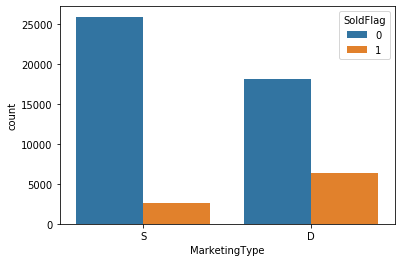

In [19]:
sns.countplot(x='MarketingType', hue='SoldFlag', data=df);

- Maybe we should give more power to this feature, for example give the second type value 2 instead of 1. We will summarize the ideas after all features are checked

In [20]:
#sns.pairplot(df)

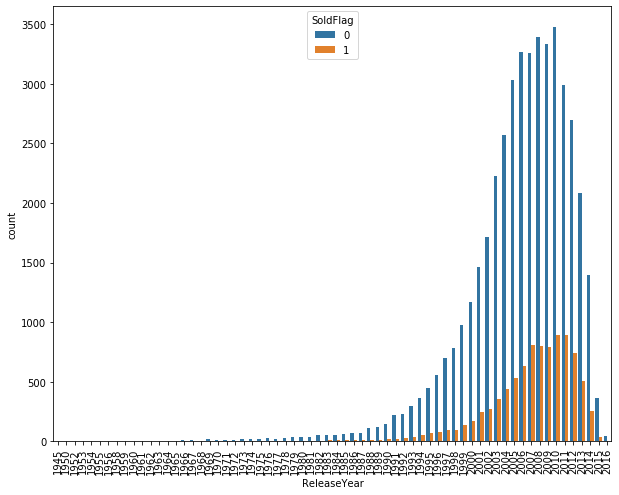

In [21]:
plt.figure(figsize=(10,8))
chart = sns.countplot(x='ReleaseYear', hue='SoldFlag', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

- [2001, 2014] - where the most sold items place themselfs.

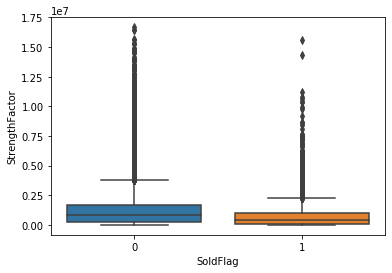

In [22]:
sns.boxplot(x='SoldFlag', y='StrengthFactor', data=df);

- There are more Outliers in this Strenght factor

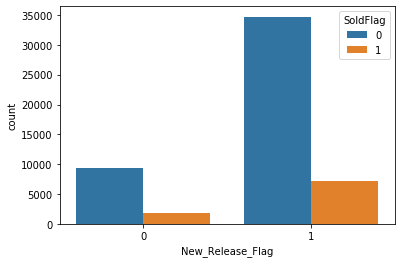

In [23]:
sns.countplot(x='New_Release_Flag', hue='SoldFlag', data=df);

- If any releases in future , the sold flag has more bias towards '0'

### Checking Corelation Matrix wrt Heatmat

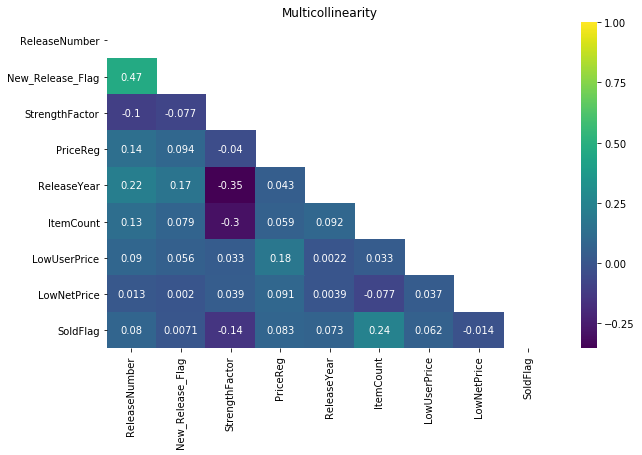

In [24]:
corr=df.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(corr)]=1   # tri-up= triu...  tri-lower=tril
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="viridis",mask=mask)
plt.title('Multicollinearity')
plt.show()

## Checking Multi-Colliearity
- Considering VIF only for continous data not for categorical data(for categorical data variation is zero)


In [60]:
df.head(2)

,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,S,0,0,1255901,32.5,2004,26,27.57,10.99,0
1,S,0,0,208404,70.0,1988,21,15.99,40.02,1


In [61]:
num_col= df.iloc[:,:-1].dtypes[df.dtypes=='int64'].index


In [62]:
x_num = df[num_col]
x_num.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,ReleaseYear,ItemCount
0,0,0,1255901,2004,26
1,0,0,208404,1988,21


In [28]:
vif = pd.DataFrame()
f= len(x_num.keys())
vif['Features']=x_num.keys()
vif['VIF Score '] = [variance_inflation_factor(x_num.values,i) for i in range(f)] 
vif

,Features,VIF Score
0,ReleaseNumber,2.759773
1,New_Release_Flag,6.070117
2,StrengthFactor,1.797570
3,ReleaseYear,7.482519
4,ItemCount,2.627242


#### All features having less VIF values
- Except Release year every thing is looks good.if we want to remove multicolinearity .
- we can remove it by aplying PCA
- Or depending on the model it automatically removes the multicollinearity

## Split the dependent and independent variables

In [63]:
X=df.iloc[:,:-1]  # indepndent variables
y=df.iloc[:,-1]    # Dependent variable

## Creating Dummies for categorical value

In [65]:
X = pd.get_dummies(X,drop_first=True)

In [66]:
X.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingType_S
0,0,0,1255901,32.5,2004,26,27.57,10.99,1
1,0,0,208404,70.0,1988,21,15.99,40.02,1


# Data Standaridation

In [67]:
mmx= MinMaxScaler()      # 0-to 1 range ,if there are no outliers use this
sc= StandardScaler()   # In this data set we can see some outliers so going for standard scaler

In [68]:
x= sc.fit_transform(X)  

In [70]:
len(y)

53197

## Feture selection using Lasso regulrization method

In [71]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [76]:
alpha = [0.0001, 0.001, 0.01,0.1,1]

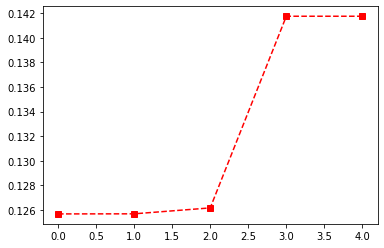

In [77]:
loss_values = []
for a in alpha:
    model_lasso = Lasso(a)
    model_lasso.fit(x,y)
    # predicting
    y_pred = model_lasso.predict(x)
    #
    loss = mean_squared_error(y,y_pred)
    loss_values.append(loss)

plt.plot(loss_values,'r--s')
plt.show()

In [78]:
# fitting mode
model_lasso = Lasso(0.001)
model_lasso.fit(x,y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

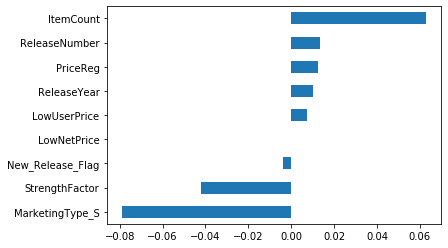

In [79]:
pars = model_lasso.sparse_coef_.toarray().flatten()

features_importance = pd.Series(pars,index=X.keys()).sort_values(ascending=True)
features_importance.plot('barh')
plt.show()

In [57]:
X.columns

Index(['ReleaseNumber', 'New_Release_Flag', 'StrengthFactor', 'PriceReg',
       'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice',
       'MarketingType_S'],
      dtype='object')

In [210]:
X_lasso=X.drop(columns=['LowNetPrice'],axis=1)

In [211]:
X_lasso.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,MarketingType_S
0,0,0,1255901,32.5,2004,26,27.57,1
1,0,0,208404,70.0,1988,21,15.99,1


## Removing 1 feature as they dont contribute to the target variable wrt lasso regularization


In [238]:
x_la= sc.fit_transform(X_lasso)  

# To check the data is balanced or not

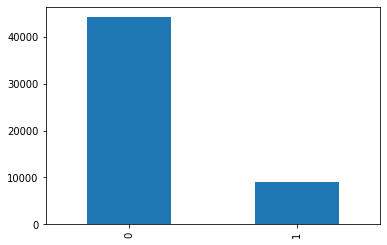

In [213]:
data['SoldFlag'].value_counts().plot('bar')

> We can say the data is unbalnced data
## Applying SMOTE to make it balanced data

In [214]:
from imblearn.over_sampling import SMOTE 

In [215]:
x_re,y_re  =SMOTE(k_neighbors=5).fit_resample(x_la,y)

In [216]:
# saving arrays
np.savez('Hist.npz',x_re,y_re)

In [217]:
#load data
data_over = np.load('Hist.npz')
data_over.files

['arr_0', 'arr_1']

In [218]:
x_over =data_over['arr_0']
y_over= data_over['arr_1']

1    44100
0    44100
dtype: int64

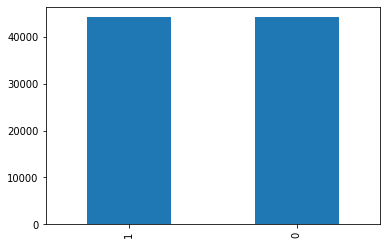

In [219]:
pd.Series(y_over).value_counts().plot('bar')
pd.Series(y_over).value_counts()

# Split in to train and test data
- using Lasso featrues

In [220]:
np.random.seed(101)
from sklearn.model_selection import train_test_split
#stratified sampling
x_train,x_test,y_train,y_test= train_test_split(x_over,y_over, test_size=0.2, stratify=y_over)

In [221]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70560, 8), (17640, 8), (70560,), (17640,))

# Model Building
- 1.XGBoost

In [107]:
import innomatics

## Checking Hyper parameters using Gridsearch cv

In [112]:
param_test1 = {'max_depth':range(2,10,3),'n_estimators':range(100,350,50)}
gsearch1= GridSearchCV( XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5),
                                      param_grid=param_test1,scoring='accuracy',cv=5)

gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 10, 3),
                         'n_estimators': range(100, 350, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [113]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 8, 'n_estimators': 300}, 0.8883928571428571)

##  XGBoost using with best  hyper parameters

In [234]:
from xgboost import XGBClassifier

model_xg=XGBClassifier(max_depth=8,
    learning_rate=0.1,
    n_estimators=300,)

In [235]:
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Evaluation, prediction, and analysis

In [236]:
cmetrics= innomatics.classification_metrics(model_xg,x_train,x_test,y_train,y_test)
cmetrics.summary(labels=['no','yes'])

Summary Report
Confusion Matrix:

for train data

        no    yes    tot
no   34280   1000  35280
yes   3905  31375  35280
tot  38185  32375  70560

for test data

       no   yes    tot
no   8227   593   8820
yes  1321  7499   8820
tot  9548  8092  17640
Classification Report:

 for train data

              precision    recall  f1-score   support

          no       0.90      0.97      0.93     35280
         yes       0.97      0.89      0.93     35280

    accuracy                           0.93     70560
   macro avg       0.93      0.93      0.93     70560
weighted avg       0.93      0.93      0.93     70560


 for test data

              precision    recall  f1-score   support

          no       0.86      0.93      0.90      8820
         yes       0.93      0.85      0.89      8820

    accuracy                           0.89     17640
   macro avg       0.89      0.89      0.89     17640
weighted avg       0.89      0.89      0.89     17640

Kappa Score for train data: 0.

## Accuracy 93% for train data

## 89% for test data

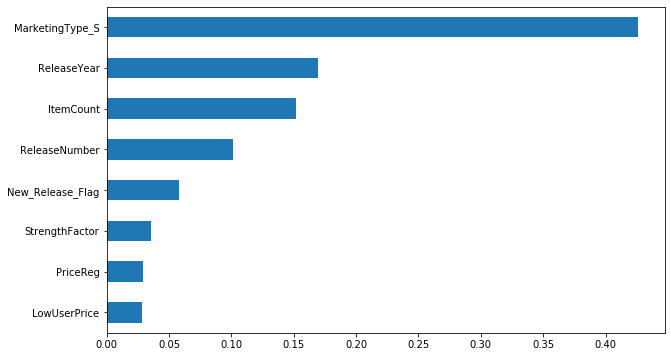

In [237]:
feaimp= pd.Series(model_xg.feature_importances_,index=X_lasso.columns)
feaimp_sort=feaimp.sort_values()
plt.figure(figsize=(10,6))
feaimp_sort.plot(kind='barh')

In [226]:
model_xg.score(x_test,y_test), model_xg.max_depth

(0.8914965986394557, 8)

# The Model is in moderate fit region, as train and test has good accuracy

# Building CNN for more accuracy

In [123]:
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout, Conv1D, MaxPool1D

In [124]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((70560, 7), (17640, 7), (17640,), (70560,))

In [126]:
x_train.shape[1]

7

In [189]:
np.sqrt(6)

2.449489742783178

In [205]:
model = Sequential()
model.add(Dense(units=4,activation='tanh',input_shape=(7,)))
model.add(Dense(units=3,activation='sigmoid'))

In [206]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 15        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [207]:
cost = tf.keras.losses.categorical_crossentropy
optimizer =tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [208]:
x_train.shape,x_test.shape, y_train.shape

((70560, 7), (17640, 7), (70560,))

In [209]:
history = model.fit(x_train,y_train,epochs=20,batch_size=100,validation_data=[x_test,y_test])

Train on 70560 samples, validate on 17640 samples
Epoch 1/20
70560/70560 [==============================] - 1s 10us/sample - loss: 1.1066 - acc: 0.2545 - val_loss: 1.0742 - val_acc: 0.2910
Epoch 2/20
70560/70560 [==============================] - 0s 7us/sample - loss: 1.0464 - acc: 0.3826 - val_loss: 1.0217 - val_acc: 0.4481
Epoch 3/20
70560/70560 [==============================] - 0s 7us/sample - loss: 0.9984 - acc: 0.4814 - val_loss: 0.9794 - val_acc: 0.5103
Epoch 4/20
70560/70560 [==============================] - 0s 7us/sample - loss: 0.9590 - acc: 0.5383 - val_loss: 0.9436 - val_acc: 0.5606
Epoch 5/20
70560/70560 [==============================] - 0s 7us/sample - loss: 0.9248 - acc: 0.5841 - val_loss: 0.9113 - val_acc: 0.6033
Epoch 6/20
70560/70560 [==============================] - 0s 7us/sample - loss: 0.8929 - acc: 0.6196 - val_loss: 0.8800 - val_acc: 0.6324
Epoch 7/20
70560/70560 [==============================] - 0s 7us/sample - loss: 0.8614 - acc: 0.6430 - val_loss: 0.8484 -

In [241]:
df_test=pd.read_csv('Historical_test_without_target.csv')
df_test.head(2)

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,36640,38309,Historical,114538,S,2,1,1349864,122.2,2003,25,16.24,10.94
1,24484,25026,Historical,259365,D,6,1,410348,56.0,2003,51,127.72,29.94


In [242]:
# Unnamed and order can be droped from dataframe
df_test.drop(columns=['Unnamed: 0','Order','File_Type','SKU_number','LowNetPrice'],axis=1,inplace=True)

In [243]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [244]:
df_test.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,MarketingType_S
0,2,1,1349864,122.2,2003,25,16.24,1
1,6,1,410348,56.0,2003,51,127.72,0


In [247]:
X_test=df_test.iloc[:,:]  # indepndent variables

In [248]:
x_new= sc.fit_transform(X_test)  

In [249]:
y_pred=model_xg.predict(x_new)

In [250]:
test=pd.DataFrame(y_pred,columns=['HIST'])

In [251]:
test.to_csv('HIST.csv',index=False)

In [252]:
test.shape

(22799, 1)